<a href="https://colab.research.google.com/github/Moraytaprime/Matem-ticas-y-ciencia-de-datos-para-la-toma-de-decisiones-Gpo-800-/blob/main/Fase_3_Entendimiento_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
#Importamos librearias requeridas
import pandas as pd
import numpy as nd
#Librerias para el manejo de datos
import matplotlib.pyplot as plt
import seaborn as sns
#Librerias para la graficacion de datos


In [174]:
df = pd.read_excel('Datosrecabados.xlsx')

In [175]:
df["Nombre actividad"].value_counts()

Nombre actividad
Uber             13
Botanas           8
Tacos             6
Garrafones        5
Helado            5
                 ..
Teatro            1
Medicinas         1
Cargadores        1
Plumas de Gel     1
Internet          1
Name: count, Length: 67, dtype: int64

In [176]:
df["Tipo"].value_counts()

Tipo
1    57
4    25
6    19
5    15
2     4
3     1
Name: count, dtype: int64

In [177]:
df["Costo"].sum()

69944

In [178]:
df["Fecha (dd/mm/aa)"].unique()

<DatetimeArray>
['2024-06-24 00:00:00', '2024-06-25 00:00:00', '2024-06-26 00:00:00',
 '2024-06-27 00:00:00', '2024-06-28 00:00:00', '2024-06-29 00:00:00',
 '2024-06-30 00:00:00', '2024-07-01 00:00:00', '2024-07-02 00:00:00',
 '2024-07-03 00:00:00', '2024-07-04 00:00:00', '2024-07-05 00:00:00',
 '2024-07-06 00:00:00', '2024-07-07 00:00:00', '2024-07-08 00:00:00',
 '2024-07-09 00:00:00', '2024-07-10 00:00:00', '2024-07-11 00:00:00',
 '2024-07-12 00:00:00', '2024-07-13 00:00:00', '2024-07-14 00:00:00',
 '2024-07-15 00:00:00', '2024-07-16 00:00:00', '2024-07-17 00:00:00',
 '2024-07-18 00:00:00', '2024-07-19 00:00:00', '2024-07-20 00:00:00']
Length: 27, dtype: datetime64[ns]

Selecionamos datos

In [179]:
df=df.iloc[:,3:9]

In [180]:
df.head(5)

,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas
0,98,120,30,1,1,4
1,510,1000,60,4,1,4
2,68,100,30,1,1,3
3,1600,2000,10,4,3,1
4,68,100,25,1,1,3


In [181]:
df.shape

(121, 6)

In [182]:
df.columns

Index(['Costo', 'Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento',
       'No. de personas'],
      dtype='object')

In [183]:
df.dtypes

Costo               int64
Presupuesto         int64
Tiempo invertido    int64
Tipo                int64
Momento             int64
No. de personas     int64
dtype: object

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Costo             121 non-null    int64
 1   Presupuesto       121 non-null    int64
 2   Tiempo invertido  121 non-null    int64
 3   Tipo              121 non-null    int64
 4   Momento           121 non-null    int64
 5   No. de personas   121 non-null    int64
dtypes: int64(6)
memory usage: 5.8 KB


Limpiar Datos

In [185]:
df.isnull().sum()

Costo               0
Presupuesto         0
Tiempo invertido    0
Tipo                0
Momento             0
No. de personas     0
dtype: int64

In [186]:
df= df.dropna()

In [187]:
df.isnull().values.any()

False

Preparando Datos

In [188]:
df.columns

Index(['Costo', 'Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento',
       'No. de personas'],
      dtype='object')

In [189]:
x = df[['Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento', 'No. de personas']].values # variables independientes
y = df['Costo'].values # variable dependiente

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [192]:
y_test

array([  305,   500, 23300,   190,   250,     4,    93,   357,   400,
          77,   315,     5,    68,    71,    32,    60,    33,   230,
         128,   135,    48,   119,   129,   119,   600])

Fase 4 Modelacion de los Datos

In [193]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()

In [194]:
model_regression.fit(x_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

In [195]:
x_labels = ['Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento', 'No. de personas']
c_label = ['Coeficientes']

In [196]:
coeff_df = pd.DataFrame(model_regression.coef_, x_labels, c_label)
coeff_df

,Coeficientes
Presupuesto,0.991584
Tiempo invertido,-0.345228
Tipo,2.239995
Momento,25.498415
No. de personas,-24.191926


In [197]:
y_pred = model_regression.predict(x_test) # realiza la predicción con el modelo generado

In [198]:
residuals = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Residual': y_test - y_pred})
residuals = residuals.sample(n=24)
residuals = residuals.sort_values(by='Real')
residuals

,Real,Predicción,Residual
5,4,-86.701711,90.701711
11,5,-84.359740,89.359740
14,32,-34.248740,66.248740
16,33,-39.004524,72.004524
20,48,38.930112,9.069888
12,68,-22.247946,90.247946
13,71,38.707197,32.292803
9,77,24.408757,52.591243
6,93,52.718524,40.281476
23,119,550.878578,-431.878578


In [199]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9990479618880305

Visualizacion de los Datos

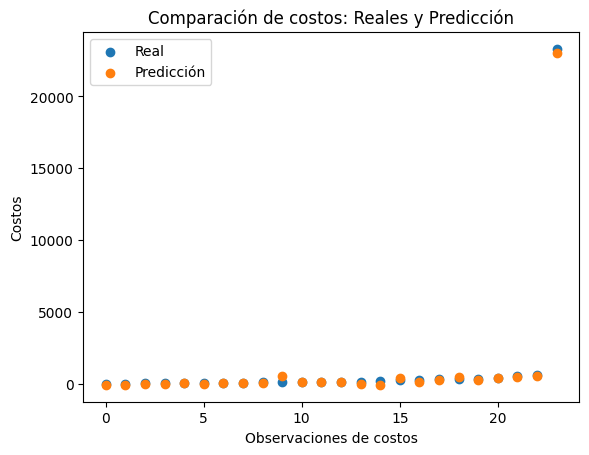

In [200]:
import matplotlib.pyplot as plt # importamos la librería pyplot que nos permitirá graficar
import numpy as np # importamos la librería numpy que nos permitirá crear un arreglo para la muestra de 30 datos

# función mágica para desplegar el gráfico en nuestra libreta
%matplotlib inline

plt.scatter(np.arange(24), residuals['Real'], label = "Real")  # creamos el gráfico con la muestra de datos reales
plt.scatter(np.arange(24), residuals['Predicción'], label = "Predicción")  # creamos el gráfico con la muestra de datos de predicción

plt.title("Comparación de costos: Reales y Predicción") # indicamos el título del gráfico

plt.xlabel("Observaciones de costos") # indicamos la etiqueta del eje de las x

plt.ylabel("Costos") # indicamos la etiqueta del eje de las y

plt.legend(loc='upper left') # indicamos la posición de la etiqueta de los datos

plt.show() # desplegamos el gráfico

In [201]:
df.describe()

,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,578.049587,646.223140,40.892562,2.950413,1.966942,1.909091
std,2623.969096,2623.954936,50.873504,2.015983,0.752040,1.678293
min,4.000000,15.000000,2.000000,1.000000,1.000000,1.000000
25%,59.000000,70.000000,13.000000,1.000000,1.000000,1.000000
50%,118.000000,135.000000,24.000000,2.000000,2.000000,1.000000
75%,279.000000,400.000000,40.000000,5.000000,3.000000,3.000000
max,23300.000000,23300.000000,300.000000,6.000000,3.000000,14.000000


In [202]:
residuals

,Real,Predicción,Residual
5,4,-86.701711,90.701711
11,5,-84.359740,89.359740
14,32,-34.248740,66.248740
16,33,-39.004524,72.004524
20,48,38.930112,9.069888
12,68,-22.247946,90.247946
13,71,38.707197,32.292803
9,77,24.408757,52.591243
6,93,52.718524,40.281476
23,119,550.878578,-431.878578
